In [14]:
!pip install odfpy

In [18]:
import pandas as pd

df = pd.read_excel("/Users/marvidal/Downloads/analysis-of-oyster-pay-as-you-go-journeys.ods", engine="odf")
df.head()

,Journeys made using Oyster Pay As You Go,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Column (See Notes):,NaN,NaN,NaN,NaN,F,G,H,I,J,...,X,NaN,Z,AA,AB,AC,AD,AE,AF,AG
2,NaN,NaN,NaN,NaN,NaN,All Oyster PAYG Journeys,NaN,NaN,NaN,NaN,...,NaN,NaN,LUL/DLR versus NR journey analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Total Revenue,NaN,Total Journeys,NaN,Incomplete Rail Journeys,...,Rate,NaN,LU/DLR Journeys,NaN,NaN,NaN,NR Journeys,NaN,NaN,NaN
4,Year,Period,No. days,Start date,End date,Bus & Tram,Rail,Bus & Tram,Rail,No. Jnys,...,%,NaN,Revenue,Total Jnys,Incomplete Jnys,NaN,Revenue,Total Jnys,Incomplete Jnys,NaN


In [22]:
#El Excel tiene varias filas de cabecera (headers) al inicio que no son datos como tal, sino títulos, notas o agrupaciones. Por eso:
#Vamos a indicarle a read_excel() que la fila correcta de cabecera es la número 5:

df = pd.read_excel(
    "/Users/marvidal/Downloads/analysis-of-oyster-pay-as-you-go-journeys.ods",
    engine="odf",
    header=5
)

df.head()

,Year,Period,No. days,Start date,End date,Bus & Tram,Rail,Bus & Tram.1,Rail.1,No. Jnys,...,%,Unnamed: 24,Revenue.1,Total Jnys,Incomplete Jnys,Unnamed: 28,Revenue.2,Total Jnys.1,Incomplete Jnys.1,Unnamed: 32
0,NaN,NaN,NaN,NaT,NaT,(£000),(£000),(000),(000),(000),...,(see Note),NaN,(£000),(000),(000),%,(£000),(000),(000),%
1,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014/15,1.0,26,2014-04-01,2014-04-26,42661.835,108598.905714,36622.144,45880.468,1024.949143,...,0.266809,NaN,78625.745,37260.454528,524.497321,0.014077,29973.160714,12531.168082,500.451821,0.039937
3,NaN,2.0,28,2014-04-27,2014-05-24,48108.114,119477.276,41164.041,49851.56,1170.44675,...,0.181095,NaN,84165.896,40271.224203,585.75825,0.014545,35311.38,14538.842047,584.6885,0.040216
4,NaN,3.0,28,2014-05-25,2014-06-21,48074.98,124715.572,41115.199,51884.762,1157.713,...,0.259872,NaN,90049.572,42577.341256,591.7605,0.013898,34666,14446.414964,565.9525,0.039176


In [24]:
# 1. Eliminar filas con todas las columnas vacías (como las dos primeras)
df = df.dropna(how='all')

# 2. Eliminar columnas sin nombre útil
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# 3. Renombrar columnas si hay duplicadas o confusas
df = df.rename(columns={
    'Bus & Tram': 'Bus_Tram_Revenue',
    'Rail': 'Rail_Revenue',
    'Bus & Tram.1': 'Bus_Tram_Journeys',
    'Rail.1': 'Rail_Journeys',
    'Revenue.1': 'Other_Revenue',
    'Total Jnys': 'Total_Journeys'
})

# Mostrar las primeras filas tras la limpieza
df.head()

,Year,Period,No. days,Start date,End date,Bus_Tram_Revenue,Rail_Revenue,Bus_Tram_Journeys,Rail_Journeys,No. Jnys,...,No.,No..1,No..2,%,Other_Revenue,Total_Journeys,Incomplete Jnys,Revenue.2,Total Jnys.1,Incomplete Jnys.1
0,NaN,NaN,NaN,NaT,NaT,(£000),(£000),(000),(000),(000),...,(000),(000),(000),(see Note),(£000),(000),(000),(£000),(000),(000)
2,2014/15,1.0,26,2014-04-01,2014-04-26,42661.835,108598.905714,36622.144,45880.468,1024.949143,...,93.012,16.877,273.465726,0.266809,78625.745,37260.454528,524.497321,29973.160714,12531.168082,500.451821
3,NaN,2.0,28,2014-04-27,2014-05-24,48108.114,119477.276,41164.041,49851.56,1170.44675,...,69.406,18.172,211.962452,0.181095,84165.896,40271.224203,585.75825,35311.38,14538.842047,584.6885
4,NaN,3.0,28,2014-05-25,2014-06-21,48074.98,124715.572,41115.199,51884.762,1157.713,...,108.33,18.594,300.857749,0.259872,90049.572,42577.341256,591.7605,34666,14446.414964,565.9525
5,NaN,4.0,28,2014-06-22,2014-07-19,49470.431,129994.637,42245.162,53953.078,1252.044,...,109.236,18.764,307.69583,0.245755,93695.972,44221.091843,639.3515,36298.665,15106.725687,612.6925


In [26]:
# Información general: tipos de datos y nulos
df.info()

# Estadísticas descriptivas para variables numéricas
df.describe()

# Comprobar valores nulos por columna
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 190
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               49 non-null     object        
 1   Period             143 non-null    float64       
 2   No. days           185 non-null    object        
 3   Start date         154 non-null    datetime64[ns]
 4   End date           154 non-null    datetime64[ns]
 5   Bus_Tram_Revenue   155 non-null    object        
 6   Rail_Revenue       155 non-null    object        
 7   Bus_Tram_Journeys  155 non-null    object        
 8   Rail_Journeys      155 non-null    object        
 9   No. Jnys           155 non-null    object        
 10  Revenue            155 non-null    object        
 11  Value              155 non-null    object        
 12  Value.1            155 non-null    object        
 13  Value.2            155 non-null    object        
 14  Value.3        

Year                 137
Period                43
No. days               1
Start date            32
End date              32
Bus_Tram_Revenue      31
Rail_Revenue          31
Bus_Tram_Journeys     31
Rail_Journeys         31
No. Jnys              31
Revenue               31
Value                 31
Value.1               31
Value.2               31
Value.3               31
Value.4               31
Est No.               31
No.                   31
No..1                 31
No..2                 31
%                     31
Other_Revenue         31
Total_Journeys        31
Incomplete Jnys       31
Revenue.2             31
Total Jnys.1          31
Incomplete Jnys.1     31
dtype: int64

. Valores nulos

Varias columnas tienen muchos valores nulos:
'Year', 'Period', 'No. days', 'Start date', 'End date' → faltan en algunas filas iniciales, posiblemente por encabezados extra.
Solo 31-32 filas válidas tienen datos reales, lo cual encaja con una periodicidad mensual o por periodos contables de TFL.

2. Tipos de datos incorrectos

Columnas como 'Bus_Tram_Revenue', 'Rail_Revenue', 'Total_Journeys', 'No. Jnys' están como object, cuando deberían ser numéricas.
Esto ocurre por símbolos como £, (, , o incluso espacios ocultos.

3. Columnas duplicadas/confusas

Hay columnas como 'Value.1', 'Value.2', 'No.1', 'No.2'... que no tienen nombres claros, y habrá que revisar o eliminar si no aportan nada.

In [28]:
# Eliminar filas con NaN en columnas clave
df = df[df['Year'].notna() & df['Start date'].notna()]
df.reset_index(drop=True, inplace=True)

# Verificamos el resultado
df.head()

,Year,Period,No. days,Start date,End date,Bus_Tram_Revenue,Rail_Revenue,Bus_Tram_Journeys,Rail_Journeys,No. Jnys,...,No.,No..1,No..2,%,Other_Revenue,Total_Journeys,Incomplete Jnys,Revenue.2,Total Jnys.1,Incomplete Jnys.1
0,2014/15,1.0,26,2014-04-01,2014-04-26,42661.835,108598.905714,36622.144,45880.468,1024.949143,...,93.012,16.877,273.465726,0.266809,78625.745,37260.454528,524.497321,29973.160714,12531.168082,500.451821
1,2015/16,1.0,32,2015-04-01,2015-05-02,51752.432,132788.575,43613.13,56829.193,1413.013629,...,73.872,20.637,314.8445,0.222818,96199.377429,45663.338673,812.188957,36589.197571,15036.129244,600.824672
2,2016/17,1.0,30,2016-04-01,2016-04-30,44221.473,123892.715143,36806.619,50776.673,1124.990786,...,54.035,22.525,197.096741,0.175199,87988.338714,41768.281197,608.826964,35904.376429,14436.725505,516.163821
3,2017/18,1.0,29,2017-04-01,2017-04-29,38069.143,109456.089,35356.07604,44671.781,1122.429429,...,110.413,21.41,267.41959,0.238251,78351.432286,37453.096889,633.023643,31104.656714,12200.872525,489.405786
4,2018/19,1.0,28,2018-04-01,2018-04-28,33510.48,97496.603,31955.438,39485.35,909.772,...,101.232,17.67,212.095335,0.23313,68867.479,32744.697906,483.82825,28629.124,11162.055954,425.94375


In [30]:
# Lista de columnas que deberían ser numéricas
cols_a_convertir = [
    'Bus_Tram_Revenue', 'Rail_Revenue', 'Bus_Tram_Journeys', 'Rail_Journeys',
    'No. Jnys', 'Other_Revenue', 'Total_Journeys'
]

# Función para limpiar los valores (quita £, comas, paréntesis)
def limpiar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('£', '').replace(',', '').replace('(', '-').replace(')', '')
    return valor

# Aplicar la limpieza y convertir a float
for col in cols_a_convertir:
    df[col] = df[col].apply(limpiar_valor).astype(float)

# Comprobamos tipos
df[cols_a_convertir].dtypes

Bus_Tram_Revenue     float64
Rail_Revenue         float64
Bus_Tram_Journeys    float64
Rail_Journeys        float64
No. Jnys             float64
Other_Revenue        float64
Total_Journeys       float64
dtype: object

In [32]:
df.head()

,Year,Period,No. days,Start date,End date,Bus_Tram_Revenue,Rail_Revenue,Bus_Tram_Journeys,Rail_Journeys,No. Jnys,...,No.,No..1,No..2,%,Other_Revenue,Total_Journeys,Incomplete Jnys,Revenue.2,Total Jnys.1,Incomplete Jnys.1
0,2014/15,1.0,26,2014-04-01,2014-04-26,42661.835,108598.905714,36622.14400,45880.468,1024.949143,...,93.012,16.877,273.465726,0.266809,78625.745000,37260.454528,524.497321,29973.160714,12531.168082,500.451821
1,2015/16,1.0,32,2015-04-01,2015-05-02,51752.432,132788.575000,43613.13000,56829.193,1413.013629,...,73.872,20.637,314.8445,0.222818,96199.377429,45663.338673,812.188957,36589.197571,15036.129244,600.824672
2,2016/17,1.0,30,2016-04-01,2016-04-30,44221.473,123892.715143,36806.61900,50776.673,1124.990786,...,54.035,22.525,197.096741,0.175199,87988.338714,41768.281197,608.826964,35904.376429,14436.725505,516.163821
3,2017/18,1.0,29,2017-04-01,2017-04-29,38069.143,109456.089000,35356.07604,44671.781,1122.429429,...,110.413,21.41,267.41959,0.238251,78351.432286,37453.096889,633.023643,31104.656714,12200.872525,489.405786
4,2018/19,1.0,28,2018-04-01,2018-04-28,33510.480,97496.603000,31955.43800,39485.350,909.772000,...,101.232,17.67,212.095335,0.23313,68867.479000,32744.697906,483.82825,28629.124,11162.055954,425.94375


In [34]:
# Lista de columnas a eliminar (ajustada a los nombres reales)
columnas_eliminar = [
    'Period', 'No..1', 'No..2',
    'Value', '%', 'Total Jnys.1'
]

# Eliminamos del dataframe
df.drop(columns=columnas_eliminar, inplace=True, errors='ignore')

# Verificamos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               22 non-null     object        
 1   No. days           22 non-null     object        
 2   Start date         22 non-null     datetime64[ns]
 3   End date           22 non-null     datetime64[ns]
 4   Bus_Tram_Revenue   22 non-null     float64       
 5   Rail_Revenue       22 non-null     float64       
 6   Bus_Tram_Journeys  22 non-null     float64       
 7   Rail_Journeys      22 non-null     float64       
 8   No. Jnys           22 non-null     float64       
 9   Revenue            22 non-null     object        
 10  Value.1            22 non-null     object        
 11  Value.2            22 non-null     object        
 12  Value.3            22 non-null     object        
 13  Value.4            22 non-null     object        
 14  Est No.     

In [36]:
df.head()

,Year,No. days,Start date,End date,Bus_Tram_Revenue,Rail_Revenue,Bus_Tram_Journeys,Rail_Journeys,No. Jnys,Revenue,...,Value.2,Value.3,Value.4,Est No.,No.,Other_Revenue,Total_Journeys,Incomplete Jnys,Revenue.2,Incomplete Jnys.1
0,2014/15,26,2014-04-01,2014-04-26,42661.835,108598.905714,36622.14400,45880.468,1024.949143,5099.771863,...,60.0453,260.4419,1181.189379,163.576726,93.012,78625.745000,37260.454528,524.497321,29973.160714,500.451821
1,2015/16,32,2015-04-01,2015-05-02,51752.432,132788.575000,43613.13000,56829.193,1413.013629,6824.459411,...,77.8689,712.83495,1765.167624,220.3355,73.872,96199.377429,45663.338673,812.188957,36589.197571,600.824672
2,2016/17,30,2016-04-01,2016-04-30,44221.473,123892.715143,36806.61900,50776.673,1124.990786,5626.794609,...,88.421,326.37215,1012.417788,120.536741,54.035,87988.338714,41768.281197,608.826964,35904.376429,516.163821
3,2017/18,29,2017-04-01,2017-04-29,38069.143,109456.089000,35356.07604,44671.781,1122.429429,5324.039396,...,85.90995,166.42035,1037.829988,135.59659,110.413,78351.432286,37453.096889,633.023643,31104.656714,489.405786
4,2018/19,28,2018-04-01,2018-04-28,33510.480,97496.603000,31955.43800,39485.350,909.772000,4374.219796,...,69.31685,206.848,893.594546,93.193335,101.232,68867.479000,32744.697906,483.82825,28629.124,425.94375


EXPLICACION VARIABLES

Year – Año académico.

No. days – Número de días del periodo.

Start date - Fechas de inicio.

End date – Fechas de fin del periodo.

Bus_Tram_Revenue – Ingresos por autobús y tranvía (£).

Rail_Revenue – Ingresos por tren (£).

Bus_Tram_Journeys – Nº de viajes en autobús y tranvía.

Rail_Journeys – Nº de viajes en tren.

No. Jnys – Número total de viajes registrados por TfL.

Other_Revenue – Otros ingresos (£).

Total_Journeys – Total de viajes.

Bus_vs_Rail – Proporción de viajes en bus/tranvía respecto al total.

In [40]:
#Análisis exploratorio básico (EDA)

#Estadísticas descriptivas de las principales variables numéricas
df.describe()

,Start date,End date,Bus_Tram_Revenue,Rail_Revenue,Bus_Tram_Journeys,Rail_Journeys,No. Jnys,Other_Revenue,Total_Journeys,Suma_Journeys
count,22,22,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,22.000000,2.200000e+01
mean,2019-04-01 08:43:38.181818112,2019-10-14 14:10:54.545454592,205194.523244,5.560905e+05,182268.246102,219752.800318,5022.458661,3.775687e+05,175221.181053,4.020210e+05
min,2014-04-01 00:00:00,2014-04-26 00:00:00,3556.932000,5.441899e+03,3712.063000,2079.430000,83.729000,3.463367e+03,1535.089028,5.791493e+03
25%,2016-07-01 06:00:00,2017-04-07 06:00:00,30240.025500,8.985228e+04,29239.763000,36709.633000,829.318039,6.329548e+04,30209.100216,6.594940e+04
50%,2019-04-01 00:00:00,2019-10-13 12:00:00,97909.816000,1.902243e+05,95096.477000,78750.069000,1815.446172,1.261712e+05,60423.810075,1.738465e+05
75%,2021-12-30 18:00:00,2022-04-22 12:00:00,353360.151994,1.046872e+06,340270.406250,413664.942750,9444.994605,7.139071e+05,336294.662749,7.511183e+05
max,2024-04-01 00:00:00,2025-03-31 00:00:00,618590.544000,1.610248e+06,524357.864000,669271.892000,15510.243884,1.160522e+06,550034.437410,1.193630e+06
std,NaN,NaN,206964.109618,5.804309e+05,182986.807098,236877.549308,5527.771678,4.122893e+05,197020.414729,4.189834e+05


Análisis de estadísticos descriptivos

Los ingresos y viajes en tren suelen ser mayores que los del autobús/tranvía, lo que indica que el tren es más utilizado o tiene tarifas más altas.

Hay mucha variación entre años, con mínimos muy bajos en 2020-2021 (probablemente por el COVID) y máximos recientes que muestran una recuperación clara.

Los viajes totales (Total_Journeys) tienen una media de unos 175.000, pero en los peores años cayeron hasta 1.500 y en los mejores superaron los 550.000.

La proporción de viajes en bus/tranvía frente al tren (Bus_vs_Rail) está normalmente cerca del 50%, pero en algunos años el tren dominó claramente.

El resto de ingresos y los viajes no clasificados son cantidades más pequeñas y no tan relevantes.


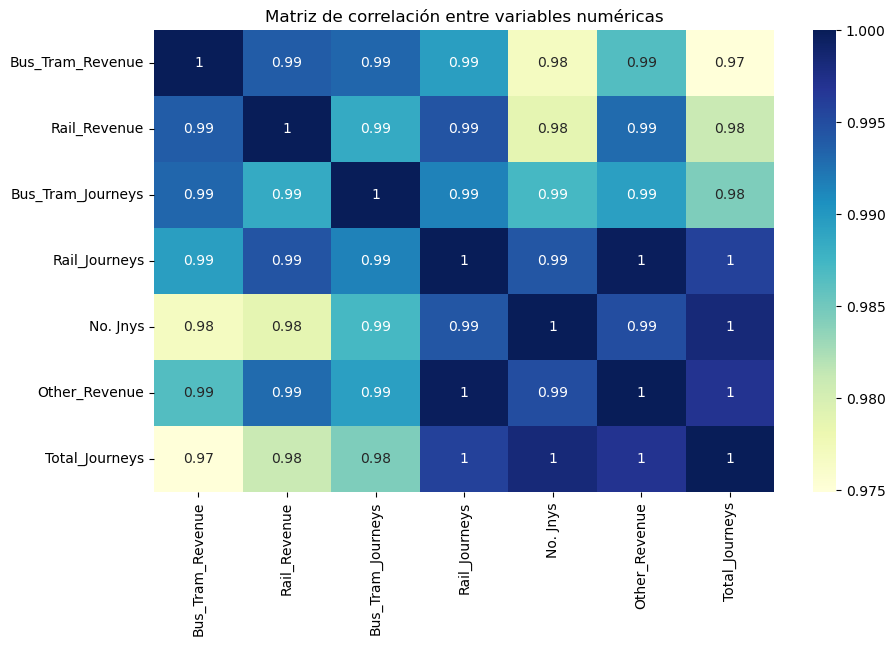

In [42]:
#Correlación entre variables numéricas

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols_a_convertir].corr(), annot=True, cmap="YlGnBu")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Todas las variables numéricas están muy fuertemente correlacionadas entre sí, con coeficientes cercanos o iguales a 1.

Por ejemplo, Bus_Tram_Journeys tiene una correlación de 0.99 con Bus_Tram_Revenue, lo que indica que cuando aumentan los viajes en bus/tranvía, también aumentan sus ingresos (y viceversa).
Lo mismo ocurre con Rail_Journeys y Rail_Revenue, que también muestran correlación perfecta o casi perfecta.

Total_Journeys y No. Jnys están prácticamente duplicando información, ya que ambas representan el total de viajes.

Other_Revenue también presenta una correlación muy alta con los viajes e ingresos, aunque en teoría debería ser una categoría independiente: esto podría indicar que sube cuando sube la actividad general del sistema.

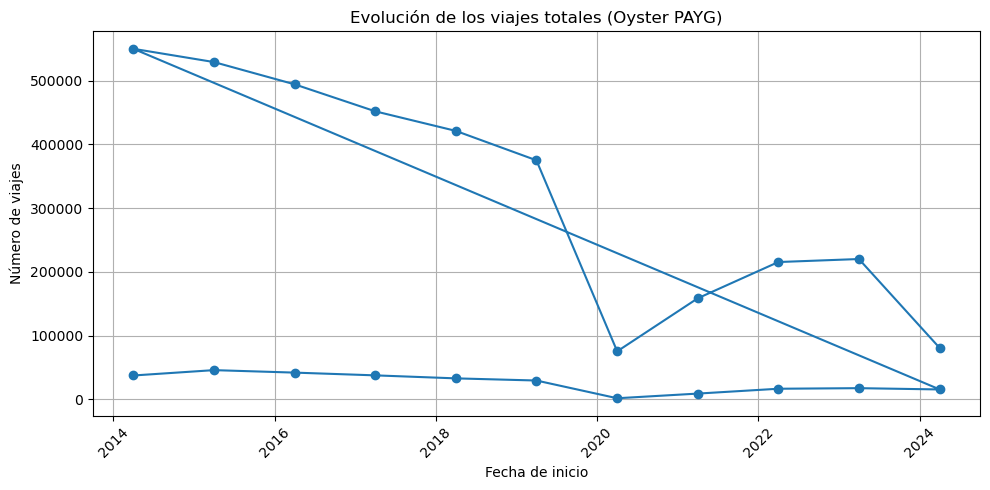

In [44]:
#Evolución temporal de los viajes totales

plt.figure(figsize=(10, 5))
plt.plot(df['Start date'], df['Total_Journeys'], marker='o')
plt.title("Evolución de los viajes totales (Oyster PAYG)")
plt.xlabel("Fecha de inicio")
plt.ylabel("Número de viajes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

La evolución de los viajes totales con tarjeta Oyster PAYG muestra una tendencia general decreciente desde 2014 hasta 2019, lo que sugiere una reducción progresiva en el uso del transporte público pagado con este sistema. Este descenso podría estar relacionado con diversos factores, como cambios en los hábitos de movilidad de los ciudadanos, políticas tarifarias menos atractivas o un aumento del uso de alternativas como la bicicleta, el coche compartido o incluso el auge del teletrabajo en los años previos a la pandemia.

El gráfico muestra un desplome abrupto en los años 2020-2021, coincidiendo claramente con la pandemia de COVID-19. Durante este periodo, las restricciones de movilidad, el confinamiento y el miedo al contagio provocaron una caída drástica en el uso del transporte público. Los niveles mínimos registrados en esos años reflejan esta situación excepcional, con cifras muy alejadas de las observadas en los años anteriores.

A partir de 2021-2022 se aprecia una recuperación paulatina, que indica que parte de los usuarios volvieron al transporte público conforme se levantaron las restricciones. Sin embargo, esa recuperación no ha sido total. Las cifras posteriores muestran que el número de viajes no ha vuelto a alcanzar los niveles previos a la pandemia, y de hecho, en 2024/25 se observa un nuevo descenso. Esto podría deberse a un cambio estructural en la forma de desplazarse por la ciudad, una posible pérdida de relevancia del sistema Oyster PAYG frente a otros métodos de pago (como tarjetas contactless o apps móviles) o una menor necesidad de viajar con frecuencia, especialmente si persisten modelos laborales más flexibles o híbridos.

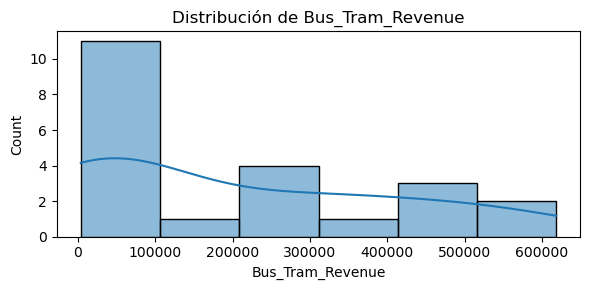

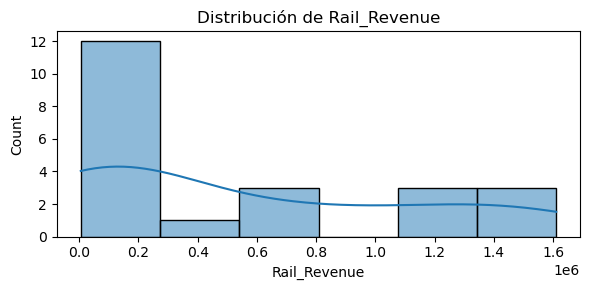

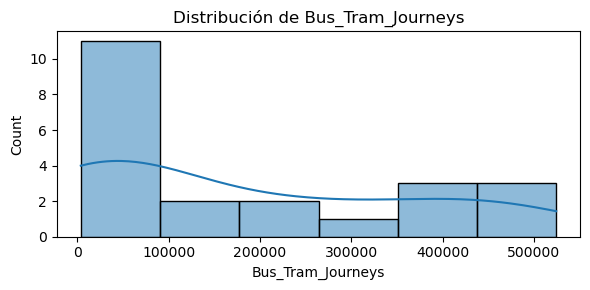

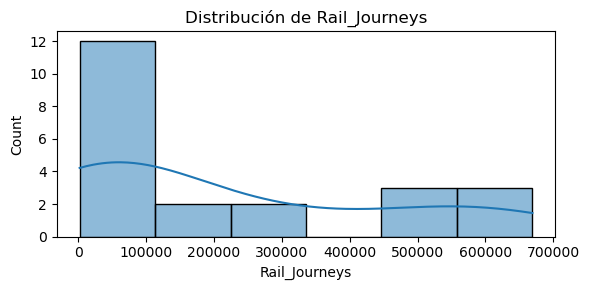

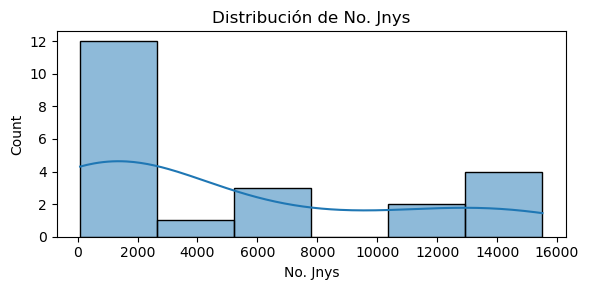

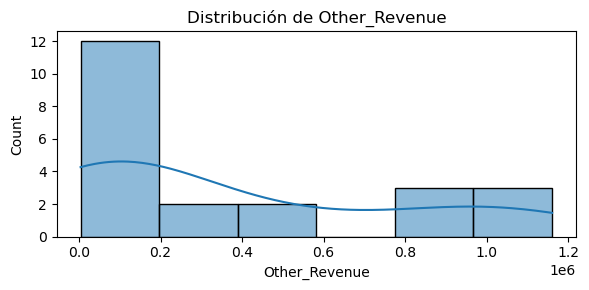

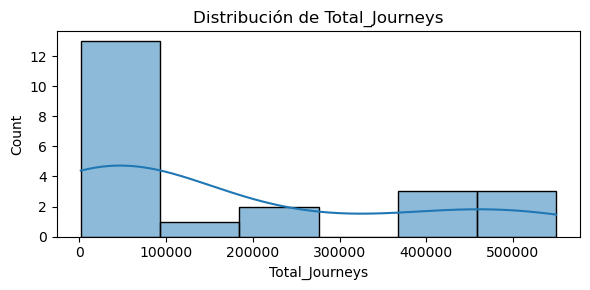

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols_a_convertir:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.show()

1. Ingresos (Revenue):

Bus_Tram_Revenue y Rail_Revenue muestran una distribución sesgada a la derecha, lo que significa que la mayoría de los periodos tienen ingresos bajos o medios, y hay pocos con ingresos muy elevados.
Rail_Revenue alcanza valores máximos mucho más altos que el transporte en bus/tranvía, lo que refuerza la conclusión de que el tren genera más ingresos.

2. Viajes (Journeys):

Tanto Bus_Tram_Journeys como Rail_Journeys tienen distribuciones muy similares: la mayoría de los valores están concentrados en la parte baja, y solo unos pocos años tienen cifras excepcionalmente altas.
Esto puede deberse al efecto de la pandemia o a la recuperación progresiva en años recientes.

3. No. Jnys (posiblemente un subtipo o viajes adicionales):

También presenta un sesgo a la derecha, con muchos valores bajos y solo unos pocos picos altos. Refuerza la idea de que se trata de un volumen de viajes menos relevante o más variable.

4. Other_Revenue:

Tiene una distribución similar a las anteriores, muy concentrada en los valores bajos. Esto indica que estos ingresos extra son minoritarios comparados con los principales modos de transporte.

5. Total_Journeys:

Aunque tiene una distribución más amplia, también está sesgada a la derecha. La mayoría de los registros tienen volúmenes bajos de viajes, probablemente por el impacto del COVID y periodos posteriores, mientras que unos pocos alcanzan cifras muy elevadas.

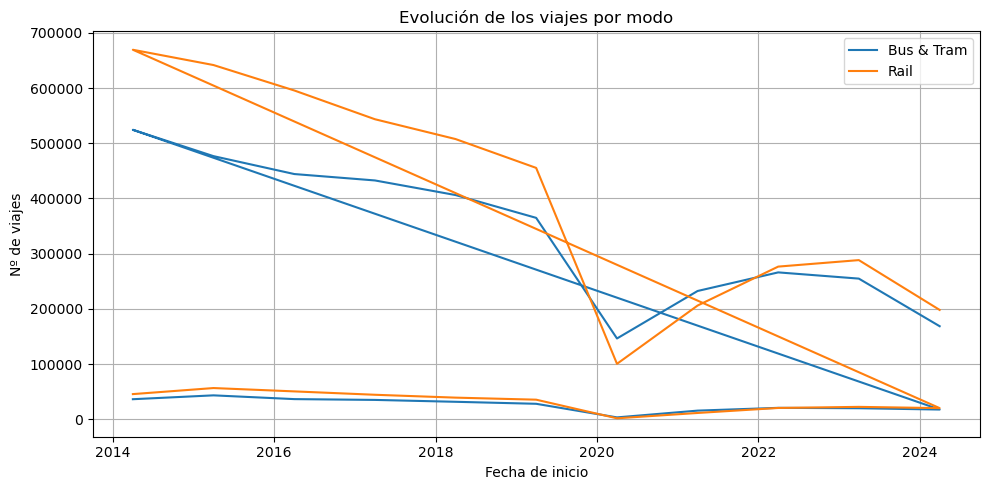

In [50]:
#Series temporales por tipo de viaje
plt.figure(figsize=(10, 5))
plt.plot(df['Start date'], df['Bus_Tram_Journeys'], label="Bus & Tram")
plt.plot(df['Start date'], df['Rail_Journeys'], label="Rail")
plt.title("Evolución de los viajes por modo")
plt.xlabel("Fecha de inicio")
plt.ylabel("Nº de viajes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Tendencia descendente general (2014–2020):
Tanto los viajes en tren como en bus/tranvía fueron disminuyendo progresivamente. Esto puede estar relacionado con:
Cambios en hábitos de movilidad (más teletrabajo, bicis, etc.)
Menor uso del sistema Oyster PAYG.

Desplome en 2020:
En ambos modos se ve una caída muy fuerte, coincidiendo claramente con la pandemia de COVID-19.
Especialmente en el tren, donde el número de viajes prácticamente se desploma.

Recuperación parcial (2021–2023):
A partir de 2021, bus/tranvía se recupera algo mejor que el tren.
El tren sube también, pero se queda por debajo del bus/tranvía durante esos años.

Nuevo bajón en 2024/25:
Ambos modos vuelven a caer. Puede deberse a nuevos cambios de hábitos, a una menor dependencia del Oyster PAYG o a factores económicos.

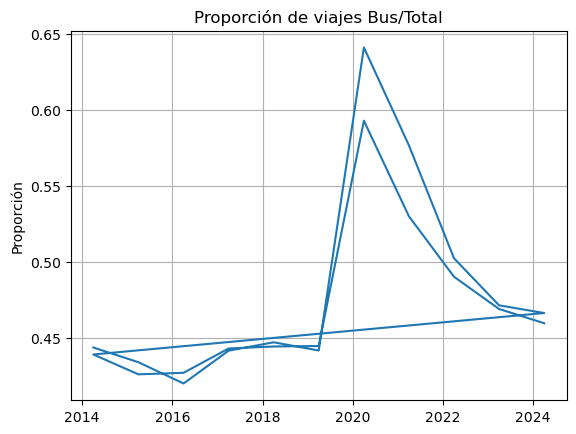

In [52]:
#Proporción de ingresos o viajes por modo
df['Bus_vs_Rail'] = df['Bus_Tram_Journeys'] / (df['Bus_Tram_Journeys'] + df['Rail_Journeys'])
plt.plot(df['Start date'], df['Bus_vs_Rail'])
plt.title("Proporción de viajes Bus/Total")
plt.ylabel("Proporción")
plt.grid(True)
plt.show()

Antes de 2020, el reparto entre bus/tranvía y tren era bastante equilibrado (el bus hacía un 43-45% del total).

En 2020, sube de golpe la proporción de viajes en bus/tranvía. Esto se debe a que el tren perdió muchos más viajeros con la pandemia.

Después, esa proporción vuelve a bajar poco a poco y se estabiliza cerca del nivel de antes, aunque el bus mantiene algo más de peso que en 2019.


CONCLUSION EDA

El uso del transporte público con tarjeta Oyster PAYG ha disminuido desde 2014, con una fuerte caída en 2020 (por la pandemia) y cierta recuperación posterior, aunque sin alcanzar niveles prepandemia. Los gráficos de barras muestran claramente que el tren genera más ingresos que el autobús por viaje. Además, el análisis sugiere un cambio de hábitos en los usuarios, posiblemente por el teletrabajo y nuevas alternativas de movilidad. Los viajes en bus muestran una mayor estabilidad a lo largo del tiempo.